In [ ]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

In [ ]:
Adj(1e-9,45,100000)

(144, 1296000000)

# 10 Nano

90Hz

In [ ]:
modulation = 90 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time #seconds

0.005555555555555556

divide cycle time in N parts

In [ ]:
cycle_nano = cycle_time *1e9

In [ ]:
cycle_nano

5555555.555555556

In [ ]:
loop_10nano = 50000

cycle_nano/loop_10nano

111.11111111111111

In [ ]:
interval = (cycle_nano) /loop_10nano

In [ ]:
interval

111.11111111111111

In [ ]:
interval*loop_10nano

5555555.555555556

In [ ]:
samples = int(3.02375e9 * (interval *1e-9))

In [ ]:
samples

335

In [ ]:
sam = Granularity(samples)

In [ ]:
sam

336

In [ ]:
interval = 1.344e-7

In [ ]:
1.1111e-7

In [ ]:
samples

341

In [ ]:
samples/48

4.729166666666667

In [ ]:
sam =336 #2nd option

In [ ]:
sam

336

In [ ]:
sam/48

7.0

In [ ]:
1.25
320

50000 gives 80 mod

## 3 time separation

In [ ]:
full_cycle = 11e-3
loop_number = 50000
part_cycle = full_cycle / loop_number
part_cycle

2.1999999999999998e-07

In [ ]:
interval = part_cycle * 1e9 #micro
interval

219.99999999999997

In [ ]:
part_cycle * loop_number

0.011

In [ ]:
cycle_time = 11e-3
comp_time = cycle_time * 2
mod = 1/comp_time
mod

45.45454545454546

In [ ]:
samples = int(3024000000 * part_cycle)
samples

665

In [ ]:
samples/48

13.854166666666666

In [ ]:
sam = Granularity(samples)
sam

672

In [ ]:
Sr = 3024000000
sam = 336

tim = sam/Sr

In [ ]:
tim

1.1111111111111111e-07

In [ ]:
interval = tim*1e9 #nano

In [ ]:
interval

111.11111111111111

# AWG and Pulse files setup

In [ ]:
AWG_Settings_10nano= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':3024000000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\10nano'
}

In [ ]:
M8190A = VisaR(AWG_Settings_10nano,60000)

In [ ]:
Initialization(M8190A,AWG_Settings_10nano)

Instruments Sampling Frecuency set to 3.02375000000000E+09Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [ ]:
M8190A.write('FREQ:RAST 3024000000')

21

In [ ]:
Pump_10nano = {
    'Name':'Pump_10nano',
    'Amplitude': 50,
    'Start time':50,
    'End time':2e-10,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [ ]:
ProbeA_10nano = {
    'Name':'ProbeA_10nano',
    'Amplitude':20,
    'Start time':10,
    'End time':90,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [ ]:
ProbeB_10nano= {
    'Name':'ProbeB_10nano',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [ ]:
PulseScheme_A_10nano =  {
    'Name' : 'PulseScheme_A_10nano',
    'Pulse Scheme': [Pump_10nano,ProbeA_10nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\10nano'
}

In [ ]:
PulseScheme_B_10nano =  {
    'Name' : 'PulseScheme_B_10nano',
    'Pulse Scheme': [ProbeB_10nano,ProbeB_10nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\10nano'
}

In [ ]:
93

In [ ]:
interval = 111

In [ ]:
111

In [ ]:
sam

672

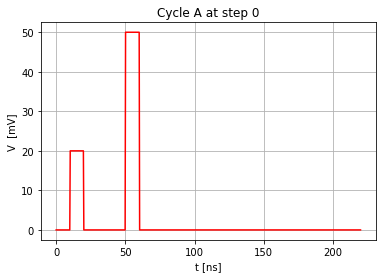

In [ ]:
step = 0
pul1 = Sweep_teil(PulseScheme_A_10nano,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 10nano, {a} step, 45 Hz.jpeg'.format(a = step , loc = PulseScheme_A_10nano['Measurement file Path']),bbox_inches='tight')

In [ ]:
sweeping_run_a_10nano = Sweeping_Single_List_File_teil(PulseScheme_A_10nano,30,interval,sam,0,30,AWG_Settings_10nano,'A')[0]

In [ ]:
sweeping_run_b_10nano = Sweeping_Single_List_File_teil(PulseScheme_B_10nano,30,interval,sam,0,30,AWG_Settings_10nano,'B')[0]

In [ ]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_45Hz_10nano_.p".format(dict = PulseScheme_A_10nano['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_10nano, k)


with open(r"{dict}\cycleB_31steps_45Hz_10nano_.p".format(dict = PulseScheme_B_10nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_10nano, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_93Hz_10nano_.p".format(dict = PulseScheme_A_10nano['Measurement file Path']), "rb") as j:
    sweeping_runa_10nano = pickle.load(j)

with open(r"{dict}\cycleB_31steps_93Hz_10nano_.p".format(dict = PulseScheme_A_10nano['Measurement file Path']), "rb") as f:
    sweeping_runb_10nano= pickle.load(f)

In [ ]:
sweeping_run_a_10nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentA_672816_30.csv'

In [ ]:
sweeping_run_b_10nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [ ]:
loop_10nano

50000

In [ ]:
Sequence_File(M8190A,sweeping_runa_10nano['Pulse File Location, at step 30'],sweeping_runb_10nano['Pulse File Location, at step 30'],5000)

Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND


0

# Loading

In [ ]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [ ]:
Lock_In_Settings = {
'Time Constant' : '10ms',
'Sensitivity' : '200 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '45Hz'
}

In [ ]:
playingtime = 20

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_10nano,sweeping_run_b_10nano,PulseScheme_A_10nano['Measurement file Path'],Lock_In_Settings,50000)

Sequence loaded with the following segment data "1,50000,0,1,0,671,2,50000,0,1,0,671" and the advancement method is COND
Average Value for measurement at step 0 is 0.7805378128136736 V
Sequence loaded with the following segment data "1,50000,0,1,0,671,2,50000,0,1,0,671" and the advancement method is COND
Average Value for measurement at step 1 is 0.7897865842474963 V
Sequence loaded with the following segment data "1,50000,0,1,0,671,2,50000,0,1,0,671" and the advancement method is COND
Average Value for measurement at step 2 is 0.7934343391868712 V
Sequence loaded with the following segment data "1,50000,0,1,0,671,2,50000,0,1,0,671" and the advancement method is COND
Average Value for measurement at step 3 is 0.7952477893478984 V
Sequence loaded with the following segment data "1,50000,0,1,0,671,2,50000,0,1,0,671" and the advancement method is COND
Average Value for measurement at step 4 is 0.7898492838731554 V
Sequence loaded with the following segment data "1,50000,0,1,0,671,2,50000,

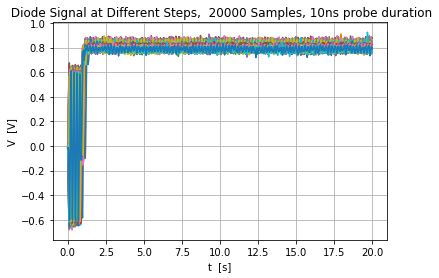

In [ ]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 10ns probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, , probe duration 10 nano,31 steps, no legend, {g} modulation .jpeg'.format(g = Lock_In_Settings['Modulation'],loc = PulseScheme_A_10nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [ ]:
time_delay = np.linspace(-40,40,31)

In [ ]:
%matplotlib inline

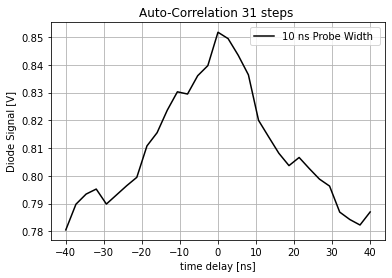

In [ ]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'10 ns Probe Width ',color='black')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes  length tc = {a}, sens {b}, {c}s DAQ, {g} modulation .jpeg'.format( g = Lock_In_Settings['Modulation'], loc = PulseScheme_A_10nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))